# DAML 03 - Stat Plots

Michal Grochmal <michal.grochmal@city.ac.uk>

Plotting functions is all fun
but what about the times when we do not actually know the function to plot?
When faced with new data it is rare that we actually face a situation with
one labeled *independent* and one labeled *dependent* variable.
This is where statistics come in,
when presented with several dimensions of data we want to be capable of plotting two things:

- several dimensions against each other
- distribution estimates of the dimensions

We have accumulated some boilerplate code to add to the beginning of the notebook,
this will keep growing as we start using more tools.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The Scatter Plot

Since we know that `matplotlib` simply draws straight lines between the points given to it,
if we do not draw the lines and just the markers we get a scatter plot.

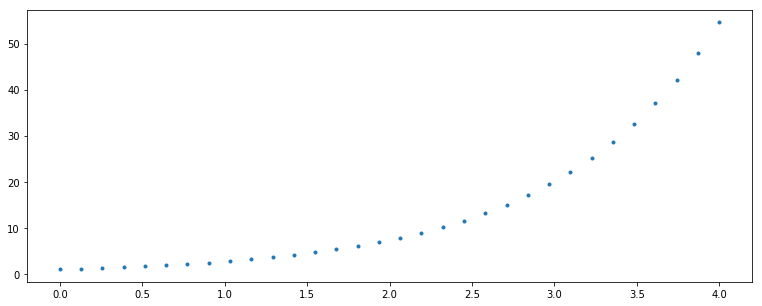

In [2]:
fig, ax = plt.subplots(figsize=(13, 5))
x = np.linspace(0, 4, 32)
y = np.exp(x)

ax.plot(x, y, '.');

That is a plot alright, and it does allow us to plot one dimension against another.
But that's about it, we cannot add more dimensions.
That seems fair, we are working in two dimensions,
therefore *we can only compare two dimensions at a time*.

Yet, **that's an incorrect assumption**.  We can do more.
Apart from the scales on each side of the plot (each axis),
one can perceive other attributes inside the plot.
Two of those are: the color of a point and the size of each point.

`plt.scatter` allows us to change the size and color of each point.
Let's have a quick look at a *four dimensional* plot.

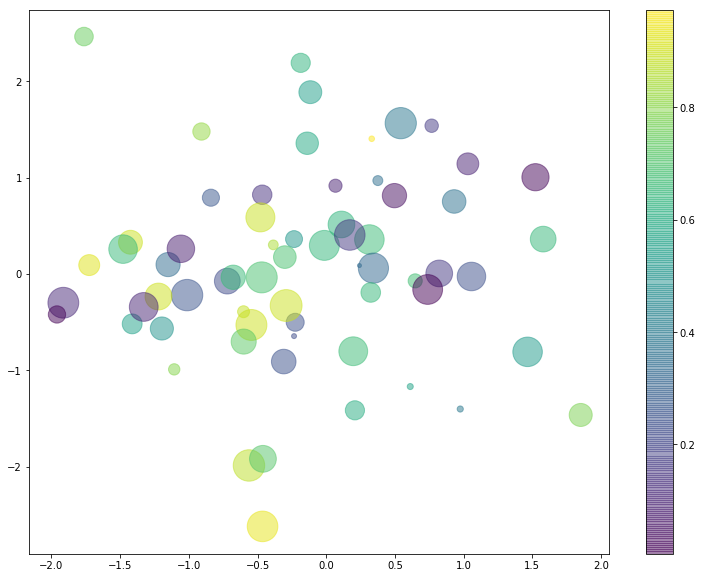

In [3]:
rng = np.random.RandomState(42)
x = rng.randn(64)
y = rng.randn(64)
colors = rng.rand(64)
sizes = 1024 * rng.rand(64)

fig, ax = plt.subplots(figsize=(13, 10))
paths = ax.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
fig.colorbar(paths);

More than two dimensions can be used,
`plt.scatter` allows to define the transparency (alpha), and marker of each point.
That said, plots with more than four dimension properties start to become difficult to distinguish,
(is that point smaller or is it just a smaller marker type?) and are rarely used.

### Note on Colormaps

Above we used a color map called `viridis`,
it is a color map which preserves luminosity across its entire color range.
The human eye is very good at spotting patters that are not actually there,
and more luminous colors may appear bigger which is not desirable most of the time.

On the other hand, if we have a known continuous distribution color maps
ranging between two colors only are a better representation.
Choosing a good color map for a graph is a difficult task and a big discussion
in the visualization field.
`matplotlib` documentation provide some discussion together with its
[reference for colormaps][colormaps].

[colormaps]: https://matplotlib.org/users/colormaps.html "Choosing a Color Map"

## Iris Data

A graph without showing actual, meaningful, data does not provide much information.
Let's jump a little ahead and download the Iris dataset from `Scikit-Learn`.
This dataset is a collection of four features of Iris flowers,
and is often used as an example of classifying Iris species from these features.
The dataset itself has a thorough description.

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

We will plot three of these features of the Iris flowers against the actual species.

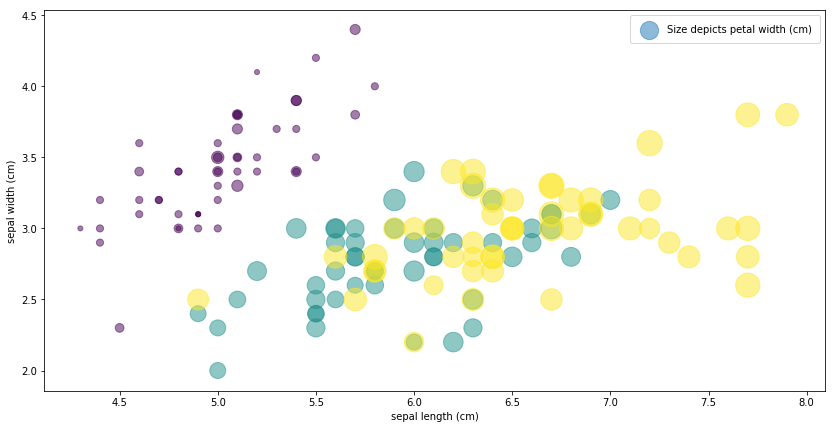

In [5]:
features = iris.data
fig, ax = plt.subplots(figsize=(14, 7))
ax.scatter(features[:, 0], features[:, 1],
           alpha=0.5, s=256*features[:, 3],
           c=iris.target, cmap='viridis',
           label='Size depicts {0}'.format(iris.feature_names[3]))
ax.legend(frameon=True, borderpad=0.9)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1]);

We just plotted four different dimensions of the data in a two dimensional plot.
The location on the plot of each point corresponds to the sepal length and width,
the size of the point is related to the petal width,
and the color is related to the particular species of flower.

## The Histogram

Nothing better to get a *feel* for the data than figuring out its distribution.
And the quick-and-dirty tool for estimating the distribution is a histogram.
`plt.hist` has lots of customization options, let's see some.

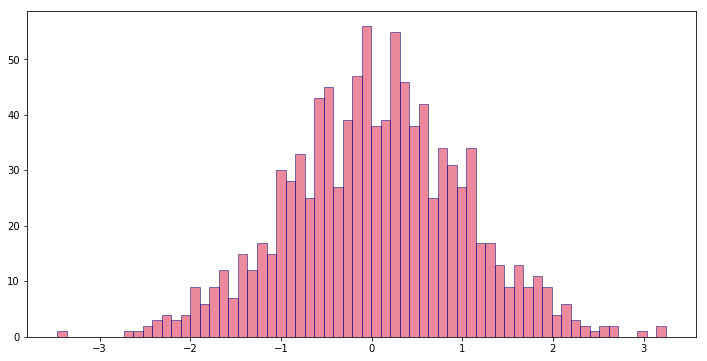

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.random.randn(1024)
plt.hist(x, bins=64, alpha=0.5, color='crimson', edgecolor='navy');

Note that if you are after a histogram without actually plotting it,
`NumPy` has its own histogram function.

In [7]:
x = np.random.randn(1024)
hist, bin_edges = np.histogram(x, bins=16)
hist, bin_edges

(array([  2,   8,  12,  46,  78, 108, 151, 183, 161, 130,  80,  32,  17,
         15,   0,   1]),
 array([-3.19543804, -2.76713699, -2.33883594, -1.91053489, -1.48223384,
        -1.05393279, -0.62563174, -0.19733069,  0.23097036,  0.65927141,
         1.08757246,  1.51587351,  1.94417456,  2.37247561,  2.80077666,
         3.22907771,  3.65737876]))

### Compare Distributions

If we want to compare the distributions of two dimensions against each other,
we have two options: plot normed histograms, or build a two dimensional histogram.

Just as we can more dimensions to our scatter plots we can add more dimensions to our histogram.
We just use two-dimensional bins.
This is an efficient manner to *compare* the distribution of *two* dimensions.
To achieve a two dimensional histogram, one need to use `plt.hist2d`.

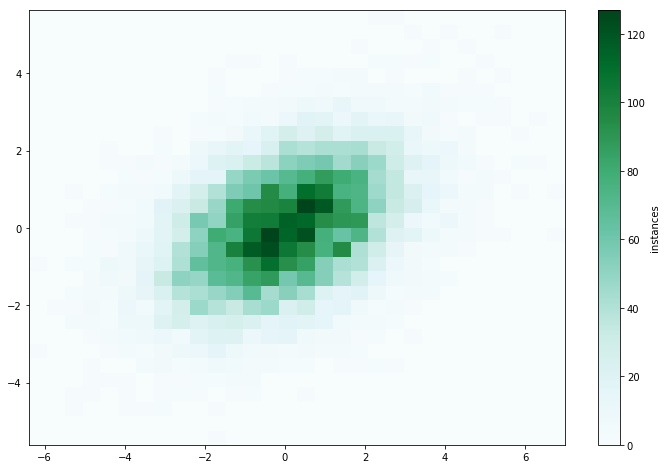

In [8]:
mean = [0, 0]
cov = [[3, 1],
       [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10240).T

fig, ax = plt.subplots(figsize=(12, 8))
hist = ax.hist2d(x, y, bins=30, cmap='BuGn')
colorbar = fig.colorbar(hist[3])
colorbar.set_label('instances')

If we need more dimensions we will need to get creative,
a three dimensional histogram is not likely to be easy to read.
Instead we can normalize the histograms (make the area below the histogram equal a unit)
with `normed=True`, and use `histtype='stepfilled'` to remove the vertical bars.
Then we add some transparency to the histograms (`alpha=`)
and we can plot several histograms together.

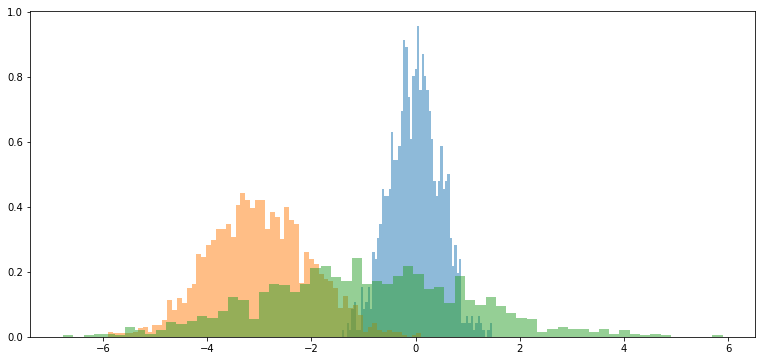

In [9]:
tall = np.random.normal(0, 0.5, 1024)
neg = np.random.normal(-3, 1, 2048)
fat = np.random.normal(-1, 2, 1024)
kwargs = dict(histtype='stepfilled', alpha=0.5, normed=True, bins=64)

fig, ax = plt.subplots(figsize=(13, 6))
ax.hist(tall, **kwargs)
ax.hist(neg, **kwargs)
ax.hist(fat, **kwargs);

## Filling areas

Where we will use `matplotlib` most will be when figuring out whether
a model we have built works or does not work.
Let's again jump ahead and walk through an `sklearn` example that
requires the use of `plt.fill_between`.

We will look at a Gaussian Process Regressor model,
which is a non-parametric model that can provide us with an
estimate of how well it fits the data at each point.
In other words, we can know the likeness where unseen data points may be.

The likeness we use is simply $2 \cdot \sigma$,
i.e. two times the standard deviation, which is about a 95% confidence region.
We also calculate the mean square error of the model,
which was the parameter that has been minimized to reach the model.
(Although the actual algorithm uses a Cholesky decomposition to reach the answer,
don't worry what a Cholesky decomposition is for now.)

1.6058088608697534

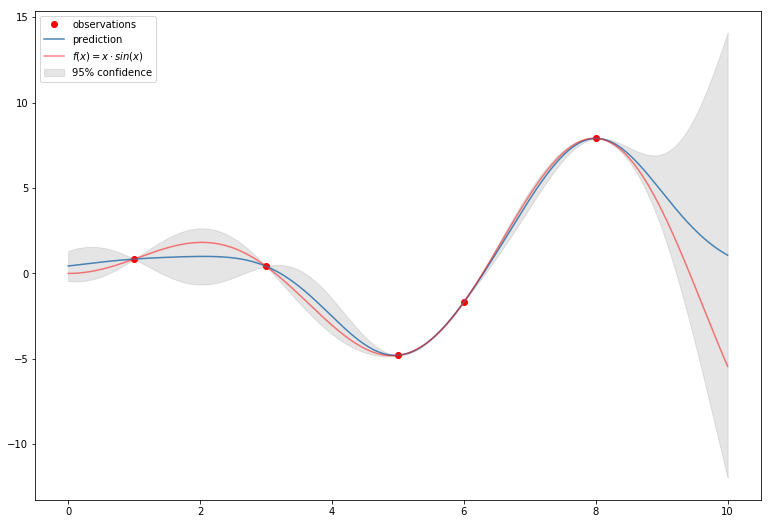

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor

model = lambda x: x * np.sin(x)
X = np.array([1, 3, 5, 6, 8])
y = model(X)
xfit = np.linspace(0, 10, 1024)

gpr = GaussianProcessRegressor(alpha=1e-3)
gpr.fit(X[:, np.newaxis], y)
yfit = gpr.predict(xfit[:, np.newaxis])
se = ((model(xfit) - yfit)**2)
dyfit = 2 * np.sqrt(se)
mse = se.mean()

fig, ax = plt.subplots(figsize=(13, 9))
ax.plot(X, y, 'or', label='observations')
ax.plot(xfit, yfit, '-', color='steelblue', label='prediction')
ax.plot(xfit, model(xfit), '-', color='red', alpha=0.5, label='$f(x) = x \cdot sin(x)$')
ax.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2, label='95% confidence')
ax.legend(loc='upper left')

mse

`plt.fill_between` receives two mandatory and at least one optional argument.
The first arguments produce the function to fill the area to,
if a third argument is not given everything from $y=0$ will be filled.
The third argument, if given, is the function (the y values) to which we fill to
(instead of zero).

Remember that for more information on `plt.fill_between` the documentation
is two keystrokes away:

In [11]:
plt.fill_between?

## References

[Scikit-Learn - Gaussian Processes Regression - Introductory Example][gauss]

[gauss]: http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html